## **1 - Loading Data & Initial Assessment Step**


In [1]:
###Importing Used Libriries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.exceptions import ConvergenceWarning ## deal with convergence warnings
import time ## track time of execution of a given piece of code

## ignore convergence warning to make the code's outputs cleaner
warnings.simplefilter('ignore', ConvergenceWarning)
warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.filterwarnings('ignore')

#### 1.1

In [2]:
#Loading data
df = pd.read_csv('/kaggle/input/twitter-tweets-sentiment-dataset/Tweets.csv')
pd.set_option('display.max_colwidth', 280) ## see entire tweet

#### 1.2

In [3]:
# Defining target variable for binary classification (negative = 1, neutral/positive = 0)
df['target'] = df['sentiment'].str.contains('negative', na=False).apply(lambda x: 1 if x else 0)
df

,textID,text,selected_text,sentiment,target
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,0
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,1
2,088c60f138,my boss is bullying me...,bullying me,negative,1
3,9642c003ef,what interview! leave me alone,leave me alone,negative,1
4,358bd9e861,"Sons of ****, why couldn`t they put them on the releases we already bought","Sons of ****,",negative,1
...,...,...,...,...,...
27476,4eac33d1c0,wish we could come see u on Denver husband lost his job and can`t afford it,d lost,negative,1
27477,4f4c4fc327,"I`ve wondered about rake to. The client has made it clear .NET only, don`t force devs to learn a new lang #agile #ccnet",", don`t force",negative,1
27478,f67aae2310,Yay good for both of you. Enjoy the break - you probably need it after such hectic weekend Take care hun xxxx,Yay good for both of you.,positive,0
27479,ed167662a5,But it was worth it ****.,But it was worth it ****.,positive,0


#### 1.3

In [4]:
## Seeing if there is any missing values
df.isnull().sum()

textID           0
text             1
selected_text    1
sentiment        0
target           0
dtype: int64

In [5]:
## Checking duplicated data
df[df.duplicated()]

print(f'Nº of duplicated rows: {df.duplicated().sum()}')

Nº of duplicated rows: 0


#### 1.4

Text(0, 0.5, 'Frequency')

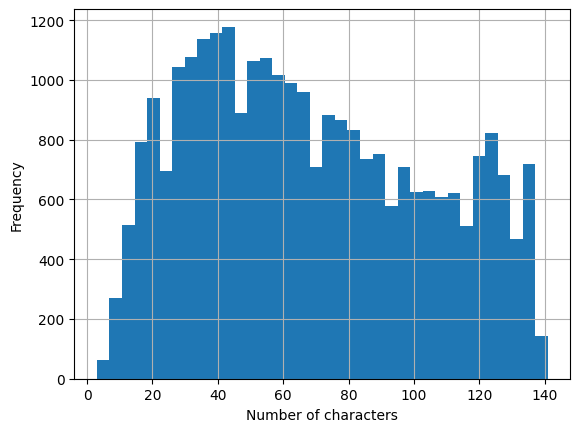

In [6]:
# Plotting histogram of number of characters in the reviews

## Getting number of characters
num_char = df['text'].str.len()

##Plot
hist = num_char.hist(bins='auto')

hist.set_xlabel('Number of characters')
hist.set_ylabel('Frequency')

#### 1.5

Text(0, 0.5, 'Frequency')

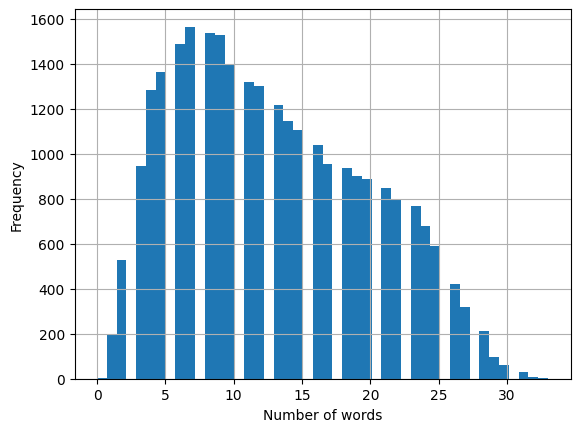

In [7]:
# Plotting histogram of number of words in the reviews

## filling NaN with ''
df2 = df
words = df2['text'].fillna('')
## Getting number of words
num_words = words.str.split().apply(len)

##Plot
hist = num_words.hist(bins='auto')

hist.set_xlabel('Number of words')
hist.set_ylabel('Frequency')

#### 1.6

In [8]:
from IPython.display import display ## display multiple df

# Showing the 5 bigger and smaller comments and their related sentiment

## Sorting dataframe by the number of words
df['num_char'] = num_char
df_sorted = df.sort_values(by='num_char', ascending=False)

## Showing 5 bigger comments and its sentiments
print("5 bigger comments: \n")
display(df_sorted[['text', 'sentiment']].head(5))


## Showing 5 bigger comments and its sentiments
print("5 smaller comments:")
display(df_sorted[['text', 'sentiment']].tail(5))

5 bigger comments: 



,text,sentiment
3138,"Is so freaking bored on the bus. Hate being poor, ï¿½4.80 return for a 10 min train or ï¿½2 return for an HOUR long bus.ipod has no battery 2",negative
27318,just saw an advert for ATTICS TO EDEN on tv out today and only ï¿½9.99 from HMV...so I`m not sure why I had to pay ï¿½13 at HMV...never mind,neutral
13896,Feeling madly sorry for myself... - ï¿½Iï¿½M SECK D= Make me feel better I should be going to a fashion show... http://tumblr.com/xz31werch,negative
2582,TODAy SUCKs - kisskass19: ï¿½you and katey broke up?! Yah Kate Broke up with me Itï¿½s been awful nd Vodkas... http://tumblr.com/xkx1wgl8r,negative
27067,"Jamie @ Sean Cody, up for some angry ****?: Jamie @ Sean Cody, I wouldn`t piss this one off Hey there Guys, Do.. http://tinyurl.com/ddyyd6",neutral


5 smaller comments:


,text,sentiment
26005,?,neutral
14339,ow,neutral
641,no,neutral
11524,aw,neutral
314,NaN,neutral


#### 1.7

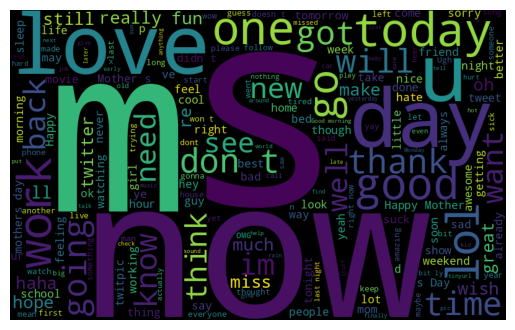

In [9]:
# Showing WordCloud with all text from reviews
from wordcloud import WordCloud # to create one

## Concatenating all text in one string to generate the wordcloud
all_text = ' '.join(str(text) for text in df['text'] if not pd.isnull(text))

## Creating wordcloud
all_text_wc = WordCloud(width = 800, height = 500).generate(all_text)
plt.axis('off')
plt.imshow(all_text_wc)

#### 1.7 (a,b,c)

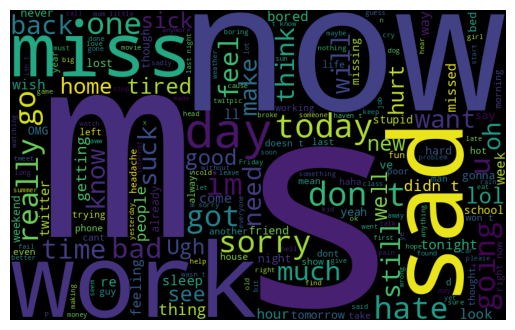

In [10]:
# Showing WordCloud of only negative comments
negative_comments = df[df['sentiment'] == 'negative']

negative_text = ' '.join(str(text) for text in negative_comments['text'] if not pd.isnull(text))

negative_text_wc = WordCloud(width = 800, height = 500).generate(negative_text)
plt.axis('off')
plt.imshow(negative_text_wc)

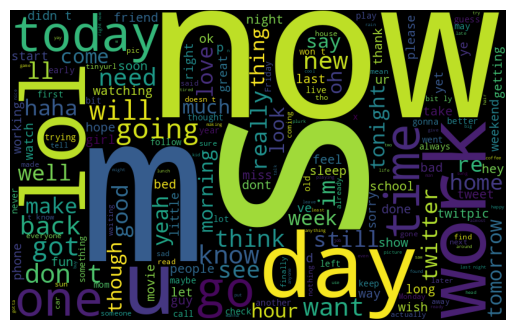

In [11]:
# Showing WordCloud of only neutral comments
neutral_comments = df[df['sentiment'] == 'neutral']

neutral_text = ' '.join(str(text) for text in neutral_comments['text'] if not pd.isnull(text))

neutral_text_wc = WordCloud(width = 800, height = 500).generate(neutral_text)
plt.axis('off')
plt.imshow(neutral_text_wc)

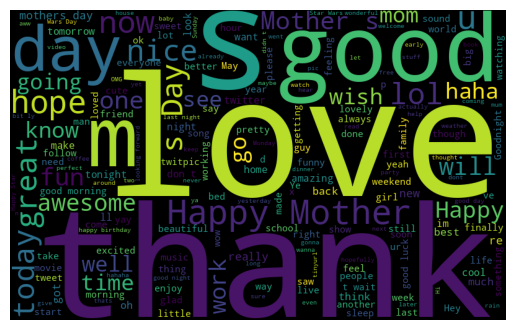

In [12]:
# Showing WordCloud of only positive comments
positive_comments = df[df['sentiment'] == 'positive']

positive_text = ' '.join(str(text) for text in positive_comments['text'] if not pd.isnull(text))

positive_text_wc = WordCloud(width = 800, height = 500).generate(positive_text)
plt.axis('off')
plt.imshow(positive_text_wc)

#### 1.8

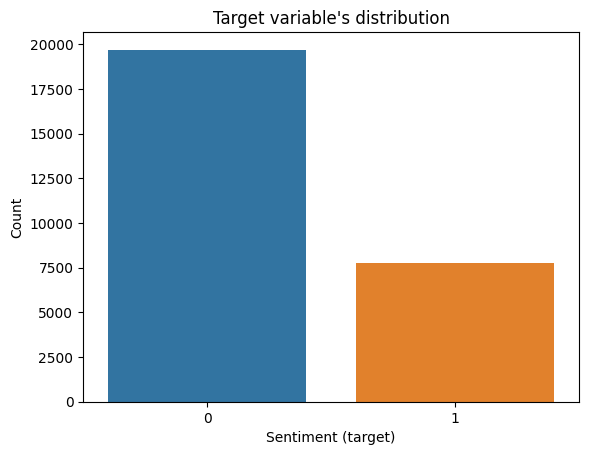

In [13]:
# Showing target variable's distribution

plt.figure()
sns.countplot(x='target', data=df, hue_order=['Negative', 'Neutral/Positive'])
plt.xlabel('Sentiment (target)')
plt.ylabel('Count')
plt.title('Target variable\'s distribution')
plt.show()

#### 1.8 (a)

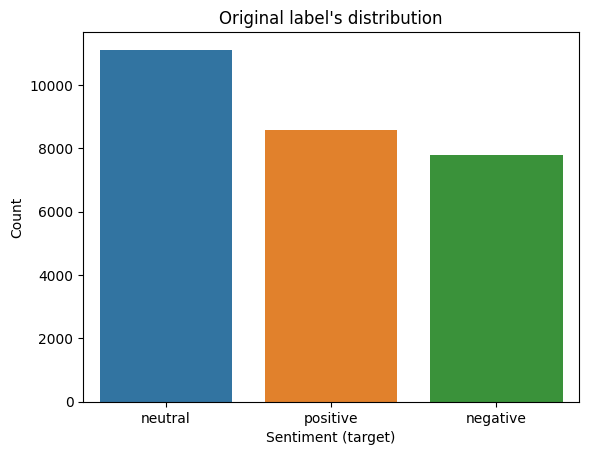

In [14]:
# Showing it with the original labels 

plt.figure()
sns.countplot(x='sentiment', data=df, order=df['sentiment'].value_counts().iloc[:].index)
plt.xlabel('Sentiment (target)')
plt.ylabel('Count')
plt.title('Original label\'s distribution')
plt.show()

## **2 - Cleaning & Data Splitting**


#### 2.1

In [15]:
# Removing  textID, selected_text, sentiment, num_words
df.drop(['textID', 'selected_text', 'sentiment', 'num_char'], axis=1,  inplace=True)
df

,text,target
0,"I`d have responded, if I were going",0
1,Sooo SAD I will miss you here in San Diego!!!,1
2,my boss is bullying me...,1
3,what interview! leave me alone,1
4,"Sons of ****, why couldn`t they put them on the releases we already bought",1
...,...,...
27476,wish we could come see u on Denver husband lost his job and can`t afford it,1
27477,"I`ve wondered about rake to. The client has made it clear .NET only, don`t force devs to learn a new lang #agile #ccnet",1
27478,Yay good for both of you. Enjoy the break - you probably need it after such hectic weekend Take care hun xxxx,0
27479,But it was worth it ****.,0


#### 2.2

In [16]:
# Removing duplicated rows (not needed but we do for ensurance)
df.drop_duplicates(inplace=True)

# Removing samples (in this case, 1) with missing values
df.dropna(subset=['text'], inplace=True)

## Checking it
df.isnull().sum()

text      0
target    0
dtype: int64

#### 2.3

In [17]:
# Splitting dataset using stratification
from sklearn.model_selection import train_test_split

## Slicing data into train_val and test sets
df_train_val, df_test = train_test_split(df, test_size=0.2, stratify=df['target'])

#### 2.4

In [18]:
# Creating new stratification to split train_val into train and val sets (using hold-out set)

df_train, df_val = train_test_split(df_train_val, train_size=0.8 , test_size=0.2, stratify=df_train_val['target'])

#### 2.5

In [19]:
# Creating the datasets that will be used by the models

##X_train, y_train, X_val, y_val  X_test y_test
target = 'target'
X_train = df_train.drop(target, axis=1)
y_train = df_train[target]
print(f' X_train shape: {X_train.shape}, y_train shape: {y_train.shape}')

X_val = df_val.drop(target, axis=1)
y_val = df_val[target]
print(f' X_val shape: {X_val.shape}, y_val shape: {y_val.shape}')

X_test = df_test.drop(target, axis=1)
y_test = df_test[target]


X_train_val = df_train_val.drop(target, axis=1)
y_train_val = df_train_val[target]
print(f' X_train_val shape: {X_train_val.shape}, y_train_val shape: {y_train_val.shape}')

## seeing if the percentage of data is splitted right
print(f' X_test shape: {X_test.shape}, y_test shape: {y_test.shape}')

print(f'\n Percentage of each set related to the whole data: \n Train_set = {(len(X_train)/len(df)):.2f} \t Val_set = {(len(X_val)/len(df)):.2f} \t Test_set = {len(X_test)/len(df):.2f}')

print(f'\n Percentage of Train/Val sets related to the Train_Val data: \n Train_set = {(len(X_train)/len(df_train_val)):.2f} \t Val_set = {(len(X_val)/len(df_train_val)):.2f}')

 X_train shape: (17587, 1), y_train shape: (17587,)
 X_val shape: (4397, 1), y_val shape: (4397,)
 X_train_val shape: (21984, 1), y_train_val shape: (21984,)
 X_test shape: (5496, 1), y_test shape: (5496,)

 Percentage of each set related to the whole data: 
 Train_set = 0.64 	 Val_set = 0.16 	 Test_set = 0.20

 Percentage of Train/Val sets related to the Train_Val data: 
 Train_set = 0.80 	 Val_set = 0.20


## **3 - Hyperparameter Selection**

#### 3.1

In [20]:
# Preprocessing pipeline
from sklearn.pipeline import Pipeline ## to built up pipelines
from sklearn.feature_extraction.text import CountVectorizer

## creates a pipeline containing only the CountVec (Convert a collection of text documents to a matrix of token counts)
prepross_CountVectorizer = Pipeline([
    ('count_vectorizer', CountVectorizer()) 
])


## fits and transform the X_train data
X_train_count = prepross_CountVectorizer.fit_transform(X_train['text'])

## transform the X_val data
X_val_count = prepross_CountVectorizer.transform(X_val['text'])

## fits and transform the X_train_val data
X_train_val_count = prepross_CountVectorizer.transform(X_train_val['text'])


## transform the X_test data
X_test_count = prepross_CountVectorizer.transform(X_test['text'])


## Getting only part of vocabulary to reduce the size of training/validation sets (reduce time training)
vectorizer_max2000 = CountVectorizer(max_features=2000) ## 2000 more frequently words of the vocabulary

## fits and transform the X_train data (reduced)
X_train_subset = vectorizer_max2000.fit_transform(X_train['text'])

## transform the X_val data (reduced)
X_val_subset = vectorizer_max2000.transform(X_val['text'])



## list of fold indices for each sample
val_index = np.concatenate([(-1)*np.ones(len(X_train['text'])), np.zeros(len(X_val['text']))]) 

#### 3.2 (a)

In [21]:
# Logistic Regression model
from sklearn.linear_model import LogisticRegression ## imports the LR model class
from sklearn.metrics import balanced_accuracy_score ## weighted accuracy (ideal when we're dealing with unbalanced data distributions in the datasets)

LogReg_model = LogisticRegression() ## instantiates the model

## Training
LogReg_model.fit(X_train_count, y_train)


## Evaluation
print(f'Train balanced accuracy: {balanced_accuracy_score(y_train, LogReg_model.predict(X_train_count)):.1%}')
print(f' Validation balanced accuracy: {balanced_accuracy_score(y_val, LogReg_model.predict(X_val_count)):.1%}')

Train balanced accuracy: 88.5%
 Validation balanced accuracy: 75.2%


#### OBS: this warning shows that the optimizer used by the logistic regression model (LBFGS) did not converge to a suitable solution within the defined maximum number of iterations

#### 3.2 (b)

In [22]:
# Optimization of Hyperparameters of the model
from sklearn.model_selection import GridSearchCV, PredefinedSplit

## defines the function for doing a grid search looking for the best combination of hyperparameters

def grid_search(model, param_grid, X_train_val, y_train_val):
    

    gs = GridSearchCV(model, param_grid, refit=False, scoring='balanced_accuracy', cv=PredefinedSplit(test_fold=val_index) ,n_jobs=-1) ## n_jobs uses all cpu cores
    
    gs.fit(X_train_val, y_train_val)
    return gs

In [23]:
start_time = time.time() ## see time spent to run this cell

## ignore convergence warning to make the code's outputs cleaner
warnings.simplefilter('ignore', ConvergenceWarning)

## Creating grid with hyperparameters
LogReg_param_grid = {
    'C': [0.05, 0.1, 1, 3],  # Regularization values C =1/λ
    'max_iter': [100, 250, 350],#,  # Max iterations to train
    'class_weight' : ['balanced', None], ## Weights associated with classes in the form {class_label: weight}
    #'solver': ['lbfgs', 'saga','liblinear','newton-cholesky'] ## Optization algorithms that supports L2 regularization
}

gs = grid_search(LogisticRegression(), LogReg_param_grid, X_train_val_count, y_train_val)
print('best_score:', gs.best_score_)
print('best_params:', gs.best_params_)

print('\n')
print(50*'-')
end_time = time.time()
print("Execution time:", (end_time - start_time)/60 , "minutes")

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

best_score: 0.7872901985906471
best_params: {'C': 1, 'class_weight': 'balanced', 'max_iter': 250}


--------------------------------------------------
Execution time: 0.1377756714820862 minutes


In [24]:
# Training model with the best parameter found by the GS
best_params_LogReg = gs.best_params_
best_model_LogReg = LogisticRegression(**best_params_LogReg)
best_model_LogReg.fit(X_train_count, y_train)


## Evaluation
print(f'Train balanced accuracy: {balanced_accuracy_score(y_train, best_model_LogReg.predict(X_train_count)):.1%}')
print(f' Validation balanced accuracy: {balanced_accuracy_score(y_val, best_model_LogReg.predict(X_val_count)):.1%}')

Train balanced accuracy: 93.8%
 Validation balanced accuracy: 79.2%


#### 3.3 (a)

In [25]:
# Training SVM model with RBF kernel
from sklearn.svm import SVC ## imports the SVM classifier model class

SVC_model = SVC(kernel='rbf') ## instantiates the model with the rbf kernel hyperparameter

## Training
SVC_model.fit(X_train_count, y_train)


## Evaluation
print(f'Train balanced accuracy: {balanced_accuracy_score(y_train, SVC_model.predict(X_train_count)):.1%}')
print(f' Validation balanced accuracy: {balanced_accuracy_score(y_val, SVC_model.predict(X_val_count)):.1%}')

Train balanced accuracy: 88.4%
 Validation balanced accuracy: 68.8%


In [26]:
params = SVC_model.get_params()
params

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

#### 3.3.(b)

In [27]:
start_time = time.time() ## see time spent to run this cell

## Creating grid with hyperparameters
SVC_RBF_param_grid = {'C':   [0.1, 1, 5, 6], ## Regularization values C =1/λ
                      'gamma': ['scale', 0.01], ## The parameter γ determines how fast the similarity decays with distance
                      'class_weight': ['balanced', None] ## Set the parameter C of class i to class_weight[i]*C for SVC
                     }

gs = grid_search(SVC(kernel='rbf'), SVC_RBF_param_grid, X_train_val_count, y_train_val) ## limit iterations due to execution time

print('best_score:', gs.best_score_)
print('best_params:', gs.best_params_)

print('\n')
print(50*'-')
end_time = time.time()
print("Execution time:", (end_time - start_time)/60 , "minutes")

#best_params: {'C': 5, 'class_weight': None, 'gamma': 'scale'} ## 0.75 on validation


best_score: 0.7898855685772067
best_params: {'C': 6, 'class_weight': 'balanced', 'gamma': 0.01}


--------------------------------------------------
Execution time: 8.991726219654083 minutes


In [28]:
# Training model with the best parameter found by the GS
best_params_SVM = gs.best_params_
best_model_SVM = SVC(**best_params_SVM)
best_model_SVM.fit(X_train_count, y_train)


## Evaluation
print(f'Train balanced accuracy: {balanced_accuracy_score(y_train, best_model_SVM.predict(X_train_count)):.1%}')
print(f' Validation balanced accuracy: {balanced_accuracy_score(y_val, best_model_SVM.predict(X_val_count)):.1%}')

Train balanced accuracy: 91.9%
 Validation balanced accuracy: 78.7%


#### 3.4 (a)

In [29]:
# Training Decision Tree model 
from sklearn.tree import DecisionTreeClassifier

DTree_model = DecisionTreeClassifier() ## instantiates the model with default parameters ## no control of depth

## Training
DTree_model.fit(X_train_count, y_train)


## Evaluation
print(f'Train balanced accuracy: {balanced_accuracy_score(y_train, DTree_model.predict(X_train_count)):.1%}')
print(f' Validation balanced accuracy: {balanced_accuracy_score(y_val, DTree_model.predict(X_val_count)):.1%}')

Train balanced accuracy: 100.0%
 Validation balanced accuracy: 70.0%


In [30]:
params = DTree_model.get_params()
params

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

#### 3.4 (b)

In [31]:
start_time = time.time() ## see time spent to run this cell

## Creating grid with hyperparameters
DTree_param_grid = {
                    'max_depth': [100, 250, None],  ## Controls maximum depth of the tree
                    'min_samples_leaf':  [1, 5], ## The minimum number of samples required to be at a leaf node
                    'min_samples_split': [2,4,8], ## The minimum number of samples required to split an internal node
                    'splitter' : ['best', 'random'] ## The strategy used to choose the split at each node. 
                                                    ## Supported strategies are “best” to choose the best split and “random” to choose the best random split.
                     }

gs = grid_search(DecisionTreeClassifier(), DTree_param_grid, X_train_val_count, y_train_val)

print('best_score:', gs.best_score_)
print('best_params:', gs.best_params_)

print('\n')
print(50*'-')
end_time = time.time()
print("Execution time:", (end_time - start_time)/60 , "minutes")

#best_params: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 8}

best_score: 0.7247425607014106
best_params: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'random'}


--------------------------------------------------
Execution time: 0.872062603632609 minutes


In [32]:
# Training model with the best parameter found by the GS
best_params_DTree = gs.best_params_
best_model_DTree = DecisionTreeClassifier(**best_params_DTree)
best_model_DTree.fit(X_train_count, y_train)


## Evaluation
print(f'Train balanced accuracy: {balanced_accuracy_score(y_train, best_model_DTree.predict(X_train_count)):.1%}')
print(f' Validation balanced accuracy: {balanced_accuracy_score(y_val, best_model_DTree.predict(X_val_count)):.1%}')

Train balanced accuracy: 100.0%
 Validation balanced accuracy: 71.3%


#### 3.5 (a)

In [33]:
# Training Random Forest model 
from sklearn.ensemble import RandomForestClassifier

RF_model = RandomForestClassifier() ## instantiates the model with default parameters 

## Training
RF_model.fit(X_train_count, y_train)


## Evaluation
print(f'Train balanced accuracy: {balanced_accuracy_score(y_train, RF_model.predict(X_train_count)):.1%}')
print(f' Validation balanced accuracy: {balanced_accuracy_score(y_val, RF_model.predict(X_val_count)):.1%}')


Train balanced accuracy: 100.0%
 Validation balanced accuracy: 70.5%


In [34]:
params = RF_model.get_params()
params

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

#### 3.5 (b)

In [35]:
start_time = time.time() ## see time spent to run this cell

## Creating grid with hyperparameters
RF_param_grid = {
                    'n_estimators' : [50, 100, 200], ## The number of trees in the forest
                    'max_depth' : [None, 100],  ## Controls maximum depth of the tree
                     'min_samples_split': [2,4], ## The minimum number of samples required to split an internal node
                    'bootstrap' : [True, False] ## Whether bootstrap samples are used when building trees. If False, the whole dataset is used to build each tree.
                     }

gs = grid_search(RandomForestClassifier(), RF_param_grid, X_train_val_count, y_train_val)

print('best_score:', gs.best_score_)
print('best_params:', gs.best_params_)

print('\n')
print(50*'-')
end_time = time.time()
print("Execution time:", (end_time - start_time)/60 , "minutes")

best_score: 0.7274811269799399
best_params: {'bootstrap': False, 'max_depth': None, 'min_samples_split': 4, 'n_estimators': 100}


--------------------------------------------------
Execution time: 11.36078929901123 minutes


In [36]:
# Training model with the best parameter found by the GS
best_params_RF = gs.best_params_
best_model_RF = RandomForestClassifier(**best_params_RF)
best_model_RF.fit(X_train_count, y_train)


## Evaluation
print(f'Train balanced accuracy: {balanced_accuracy_score(y_train, best_model_RF.predict(X_train_count)):.1%}')
print(f' Validation balanced accuracy: {balanced_accuracy_score(y_val, best_model_RF.predict(X_val_count)):.1%}')

Train balanced accuracy: 99.9%
 Validation balanced accuracy: 72.3%


#### 3.6 (a)

In [37]:
# Training Gradient Boosting model 
from sklearn.ensemble import GradientBoostingClassifier

GB_model = GradientBoostingClassifier() ## instantiates the model with default parameters 

## Training
GB_model.fit(X_train_count, y_train)


## Evaluation
print(f'Train balanced accuracy: {balanced_accuracy_score(y_train, GB_model.predict(X_train_count)):.1%}')
print(f' Validation balanced accuracy: {balanced_accuracy_score(y_val, GB_model.predict(X_val_count)):.1%}')

Train balanced accuracy: 65.1%
 Validation balanced accuracy: 64.3%


In [38]:
params = GB_model.get_params()
params

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'log_loss',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

#### 3.6 (b)

In [39]:
start_time = time.time() ## see time spent to run this cell

## Creating grid with hyperparameters
GB_param_grid = {
                     'n_estimators' : [100, 500], ## The number of boosting stages to perform.
                    'min_samples_split': [2, 4], ## The minimum number of samples required to split an internal node 
                    'max_depth': [3,9], ## Maximum depth of the individual regression estimators
                    'learning_rate' : [0.1, 0.2, 1] ## Learning rate shrinks the contribution of each tree by learning_rate. There is a trade-off between learning_rate and n_estimators
                     }

gs = grid_search(GradientBoostingClassifier(), GB_param_grid, X_train_val_count, y_train_val)

print('best_score:', gs.best_score_)
print('best_params:', gs.best_params_)

print('\n')
print(50*'-')
end_time = time.time()
print("Execution time:", (end_time - start_time)/60 , "minutes")

best_score: 0.7520959415156196
best_params: {'learning_rate': 1, 'max_depth': 3, 'min_samples_split': 2, 'n_estimators': 100}


--------------------------------------------------
Execution time: 24.640632526079813 minutes


In [40]:
# Training model with the best parameter found by the GS
best_params_GB = gs.best_params_
best_model_GB = GradientBoostingClassifier(**best_params_GB)
best_model_GB.fit(X_train_count, y_train)


## Evaluation
print(f'Train balanced accuracy: {balanced_accuracy_score(y_train, best_model_GB.predict(X_train_count)):.1%}')
print(f' Validation balanced accuracy: {balanced_accuracy_score(y_val, best_model_GB.predict(X_val_count)):.1%}')

Train balanced accuracy: 81.2%
 Validation balanced accuracy: 75.4%


## **4 - Retraining and Results on the Test Set**

#### 4.1 (a,b)

In [41]:
# Retraining the LogReg model with the best hyperparameters found previously

## Using the X_train_val as the training set from now on

# Training model with the best parameter found by the GS
best_model_LogReg = LogisticRegression(**best_params_LogReg)
best_model_LogReg.fit(X_train_val_count, y_train_val)


## Evaluation
print(f'Train+Val balanced accuracy: {balanced_accuracy_score(y_train_val, best_model_LogReg.predict(X_train_val_count)):.1%}')
print(f' Test balanced accuracy: {balanced_accuracy_score(y_test, best_model_LogReg.predict(X_test_count)):.1%}')

Train+Val balanced accuracy: 92.8%
 Test balanced accuracy: 78.0%


#### 4.2 (a,b)

In [42]:
# Retraining the SVM (w/ RBF kernel) model with the best hyperparameters found previously

## Using the X_train_val as the training set from now on

# Training model with the best parameter found by the GS
best_model_SVM = SVC(**best_params_SVM)
best_model_SVM.fit(X_train_val_count, y_train_val)


## Evaluation
print(f'Train+Val balanced accuracy: {balanced_accuracy_score(y_train_val, best_model_SVM.predict(X_train_val_count)):.1%}')
print(f' Test balanced accuracy: {balanced_accuracy_score(y_test, best_model_SVM.predict(X_test_count)):.1%}')

Train+Val balanced accuracy: 91.0%
 Test balanced accuracy: 78.0%


#### 4.3 (a,b)

In [43]:
# Retraining the Decision Tree model with the best hyperparameters found previously

## Using the X_train_val as the training set from now on

# Training model with the best parameter found by the GS
best_model_DTree = DecisionTreeClassifier(**best_params_DTree)
best_model_DTree.fit(X_train_val_count, y_train_val)


## Evaluation
print(f'Train+Val balanced accuracy: {balanced_accuracy_score(y_train_val, best_model_DTree.predict(X_train_val_count)):.1%}')
print(f' Test balanced accuracy: {balanced_accuracy_score(y_test, best_model_DTree.predict(X_test_count)):.1%}')

Train+Val balanced accuracy: 99.9%
 Test balanced accuracy: 70.8%


#### 4.4 (a,b)

In [44]:
# Retraining the Random Forest model with the best hyperparameters found previously

## Using the X_train_val as the training set from now on

# Training model with the best parameter found by the GS
best_model_RF = RandomForestClassifier(**best_params_RF)
best_model_RF.fit(X_train_val_count, y_train_val)


## Evaluation
print(f'Train+Val balanced accuracy: {balanced_accuracy_score(y_train_val, best_model_RF.predict(X_train_val_count)):.1%}')
print(f' Test balanced accuracy: {balanced_accuracy_score(y_test, best_model_RF.predict(X_test_count)):.1%}')

Train+Val balanced accuracy: 99.9%
 Test balanced accuracy: 71.6%


#### 4.5 (a,b)

In [45]:
# Retraining the Gradient Boosting model with the best hyperparameters found previously

## Using the X_train_val as the training set from now on

# Training model with the best parameter found by the GS
best_model_GB = GradientBoostingClassifier(**best_params_GB)
best_model_GB.fit(X_train_val_count, y_train_val)

## Evaluation
print(f'Train+Val balanced accuracy: {balanced_accuracy_score(y_train_val, best_model_GB.predict(X_train_val_count)):.1%}')
print(f' Test balanced accuracy: {balanced_accuracy_score(y_test, best_model_GB.predict(X_test_count)):.1%}')

Train+Val balanced accuracy: 81.0%
 Test balanced accuracy: 74.5%


## **5 - Results analysis**

#### 5.1 (a,b)

##### OBS: the LogReg and SVC models reached almost the same balanced accuracy on the test set (approximately 0.06% better for the SVM, so, without performing k-fold cross-validation, we can't tell which one is better on average).

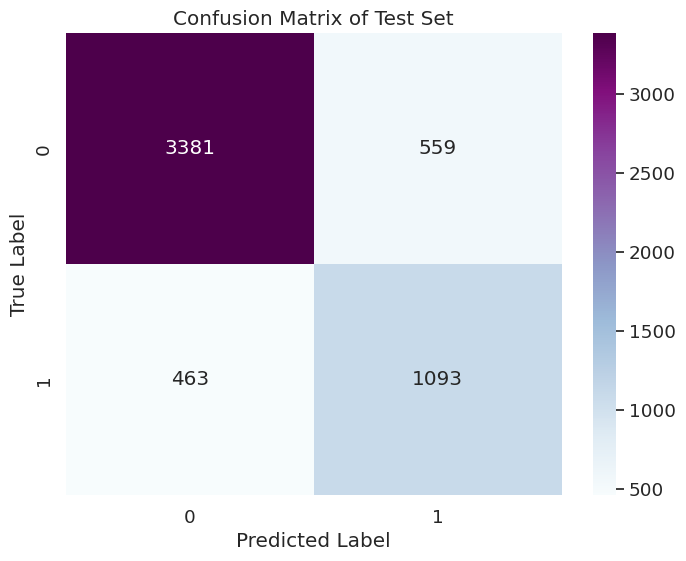

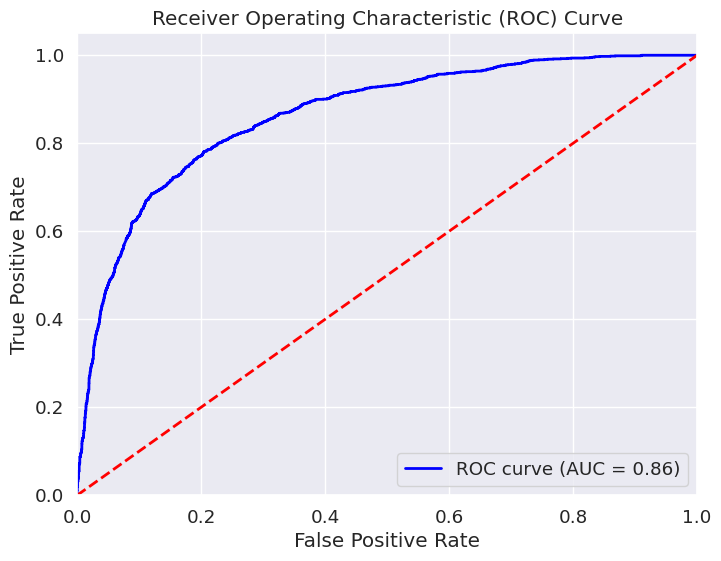

In [46]:
# Showing the confusion matrix and ROC curve of the best model
from sklearn.metrics import confusion_matrix, roc_curve, auc

## Retrain to obtain the predict_proba to ROC curve
best_model_SVM = SVC(**best_params_SVM, probability=True)
best_model_SVM.fit(X_train_val_count, y_train_val)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, best_model_SVM.predict(X_test_count))

## convert to pandas to better displaying (ease to the eyes)
conf_matrix_df = pd.DataFrame(conf_matrix)

# Plot
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='BuPu', cbar=True)
plt.title('Confusion Matrix of Test Set')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()




# ROC Curve
## Calculates the probabilities with respect to the positive class
y_pred_prob = best_model_SVM.predict_proba(X_test_count)[:, 1]

## Calculates the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

## Calculates the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

## Plot
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

#### 5.2 (a,b)

In [47]:
# Using the Random Forest model
# Finding the 10th more important words for this model
words_sorted = pd.Series(best_model_DTree.feature_importances_,
          index= prepross_CountVectorizer.get_feature_names_out()
         ).sort_values(ascending=False)

print('10th more important words')
display(words_sorted.head(10))


# Finding wrong predictions of this model

## Gets predictions on test set
RF_y_pred = best_model_DTree.predict(X_test_count)

## Find wrong predictions' index
errors_index = (RF_y_pred != y_test)

## Select 5 wrong classifications
miss_class = X_test[errors_index][:5]
## Ground-truth
true_labels = y_test[errors_index][:5]
## Predictions
predicted_class = RF_y_pred[errors_index][:5]

miss_class_cases = {
    "Tweet": miss_class.values.flatten(),
    "True Labels": true_labels.values.flatten(),
    "Predicted Class": predicted_class
}


pd.DataFrame(miss_class_cases, index=errors_index[:5].index) ## indexes are the indexes of the test set

10th more important words


sad      0.023650
miss     0.019804
sorry    0.019340
hate     0.017555
love     0.011488
sucks    0.010948
sick     0.010881
not      0.009408
hurts    0.009270
bad      0.009152
dtype: float64

,Tweet,True Labels,Predicted Class
26883,Everyone we have another hater,1,0
20114,"At the doctor`s office, waiting for Dr. Sufka to see me. Tired of being sick hope everyone else is having better Friday than me.",1,0
11535,My twitter is on c r a c k,1,0
26822,Suffering from Hemorrhoids.,1,0
15685,Omg. I got no sleep again. Neighbors are building a deck & they`ve been starting @ 5:00am. I`m SO tired. Feel like I just took Benadryl,1,0


## **6 - Conclusion**

#### 6.1

* During the process of coding this notebook, I've learned a lot about hyperparameter tunning and its importance, where we can, even for a bad model for a given application/problem, unlock its potential for that data. I've learned also about tokenization for dealing with text data and some important concepts such as the concept of a Bag of Words, Corpus, or Document in the context of NLP. This was also the first time I've worked with the wordcloud library and I pretty much liked it!
* I've got some questions about how we're supposed to approach the hyperparameter tunning when dealing with a new model that we've never tunned before, I mean if we don't know how a hyperparameter will affect the metric that we're interested in, how to choose a subset that can probably give us the best response? Does the word cloud have any interpretation or is it just a stylish way to show NLP data? Is there any way of using the GPU for doing the GridSearch on sk-learn?


#### 6.2

* One "main" limitation of this approach is that all the models aren't the best choices to deal with this type of problem, which can be seen by noticing the fact that the best results are given by the best models to deal with binary classification. Also, the way of dealing with the data (Bag of Words) isn't that good: this representation lacks a correlation between words, and the order of the words also doesn't matter, so the model is not able to get more information from the context. This also implies that the models tested using this approach don't get sarcasm pretty well, misspredicting them. 